# Lending Club - Loan Data Analysis

by Kuldeep Saini and Suryansh Patel
<br>
Date:7/21/2020



### Business Objectives
Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
 
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

### The strategy

Will compare the average default rates across various independent variables against the target variable and tring to find out the which one is most impacting the defult rate.


This analysis can be divided in following parts :-

1. Data understanding
2. Data cleaning
3. Data Analysis 
4. Recommendations


In [1]:
# importing the libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data files 
loan_df = pd.read_csv("loan.csv",sep=',', error_bad_lines=False, index_col=False)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Exploration 

In [3]:
# Data exploration
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<mark> This dataframe have 111 columns and need to expand the column display value to see all of them.</mark>

In [4]:
## Setting up to see all the columns in dataframe 
pd.set_option('display.max_columns', None)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Data exploration
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
# Data exploration
pd.set_option('display.max_rows', 120)
print(loan_df.isnull().sum())


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
# Data exploration
round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


#### Data Exploration finding

1. Many columns have null/NaN value, so we need to get rid of those columns.

2. There are variouse eligable columns that can be used as independent variables in this dataset as loan_amnt,	funded_amnt,	funded_amnt_inv	term,	int_rate,	installment,	grade,	sub_grade,	emp_title,	emp_length	, home_ownership, annual_inc, verification_status, issue_d, pymnt_plan, purpose,	title, etc.

3. The ***loan_status*** will be the target variable.


# Data Cleaning


Many columns have 100% missing values. The procedure below removes columns with 70% or more missing values.

In [8]:
# removing the columns having more than 70% missing values
loan_df= loan_df.loc[:,(loan_df.isnull().sum()/len(loan_df.index)) < 0.70]
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
# summarise number of missing values again
(loan_df.isnull().sum()/len(loan_df.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [10]:
# let's analysis desc column 
loan_df['desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

The "desc" column has the applicant's comments when they're applying for a loan. This information can be used if a text analysis id one, however for this project we did not utilize this method and the column was dropped. Also only 68% of the column was populated, hence another reason to drop the column. 

In [11]:
# let's analysis mths_since_last_delinq column 
print(loan_df.loc[:,['mths_since_last_delinq', 'loan_status']])

       mths_since_last_delinq  loan_status
0                         NaN   Fully Paid
1                         NaN  Charged Off
2                         NaN   Fully Paid
3                        35.0   Fully Paid
4                        38.0      Current
...                       ...          ...
39712                     0.0   Fully Paid
39713                     5.0   Fully Paid
39714                     0.0   Fully Paid
39715                     0.0   Fully Paid
39716                    11.0   Fully Paid

[39717 rows x 2 columns]


The "mths_since_last_delinqre", is number of months since the borrower's last delinquency. This information will not be available at the time of loanee's application. so we will drop this column.

In [12]:
# dropping the 'desc', 'mths_since_last_delinq' columns
loan_df=loan_df.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [13]:
# summarise number of missing values again
(loan_df.isnull().sum()/len(loan_df.index))*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

Now columns looks good, lets validate rows for null values and all.

In [14]:
# null values in rows
loan_df.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [15]:
# more than 10 total null value in a rows  
len(loan_df[loan_df.isnull().sum(axis=1) > 10].index)

0

#### Let's also check data types.

In [16]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
# let's convert term to int
loan_df['term'] = loan_df['term'].apply(lambda x: pd.to_numeric(x.split(" ")[1]))
loan_df['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

In [18]:
# let's convert term to float
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [19]:
# checking the data types
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int64  
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [20]:
# Let's drop null values from emp_length

print(loan_df['emp_length'].isnull().sum())
loan_df = loan_df[~loan_df['emp_length'].isnull()]

#Extract the years as number form emp_length as considering less then one year as 0.9
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: float(str(x).replace('+ years','').replace('< 1 year','0.9').replace(' years','').replace(' year','')))

#verifying  
loan_df.info()

#reset_index
loan_df=loan_df.reset_index()

#verifying  
loan_df.info()

1075
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int64  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  float64
 12  home_ownership              38642 non-null  object 
 13  annual_inc                

<mark>Now data looks good. </mark>

-------------------



## Data Analysis

Now lets do the data analysis.

#### Strategy:

Lets find out all the variablse which are available at time of apply the loan application as only those can be the independent variables.



In [21]:
## solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
## Add labels to the end of each bar in a bar chart.
 
def add_value_labels(ax, a=None):
    locs, labels = plt.xticks() 
    count = {}
    x = 0
    
    if not a is None:
        for key, value in d.items():
            count[str(key)] = value

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if a is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(count[str(labels[x].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        x = x+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [22]:
relavent =  [
'member_id',
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'term',
'int_rate',
'installment',
'grade',
'sub_grade',
'emp_title',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'loan_status',
'pymnt_plan',
'purpose',
'title',
'zip_code',
'addr_state',
'dti',
'initial_list_status',
'collections_12_mths_ex_med',
'policy_code',
'acc_now_delinq',
'chargeoff_within_12_mths',
'delinq_amnt',
'application_type',
'pub_rec_bankruptcies',
'tax_liens',
'issue_d'
    ,'total_pymnt'
]
sub_df = loan_df.loc[ :,relavent]

In [23]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38642 entries, 0 to 38641
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   38642 non-null  int64  
 1   loan_amnt                   38642 non-null  int64  
 2   funded_amnt                 38642 non-null  int64  
 3   funded_amnt_inv             38642 non-null  float64
 4   term                        38642 non-null  int64  
 5   int_rate                    38642 non-null  float64
 6   installment                 38642 non-null  float64
 7   grade                       38642 non-null  object 
 8   sub_grade                   38642 non-null  object 
 9   emp_title                   37202 non-null  object 
 10  emp_length                  38642 non-null  float64
 11  home_ownership              38642 non-null  object 
 12  annual_inc                  38642 non-null  float64
 13  verification_status         386

---
---

# Univariant Analysis 

--------
--------
### Variable : loan_status

In [24]:
#Exploring loan_status
sub_df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

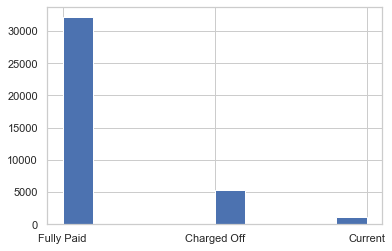

In [25]:
sub_df['loan_status'].hist()

<mark> Now the target variable "loan_status" need to be convert like boollean value 0 or 1. 1 meaning person has defaulted and 0 meaning fully paid.  We will remove all the current loan status records. </mark>


In [26]:
# Removing all "current" status loan status records.
sub_df = sub_df[sub_df['loan_status'] != 'Current']

In [27]:
sub_df['loan_status'] = sub_df['loan_status'].apply(lambda x: pd.to_numeric(0) if x=='Fully Paid' else pd.to_numeric(1))

#Exploring loan_status
sub_df['loan_status'].value_counts()


0    32145
1     5399
Name: loan_status, dtype: int64

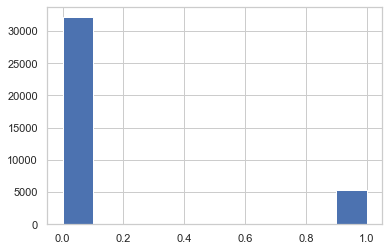

In [28]:
sub_df['loan_status'].hist()

In [29]:
# default rate
round(np.mean(sub_df['loan_status']), 2)

0.14

#The overall default rate is about 14%.

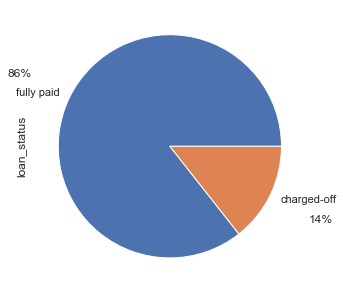

In [30]:
plt.figure(figsize=(5,7))
labels = [ 'fully paid', 'charged-off']
ax = sub_df.groupby('loan_status').loan_status.count().plot.pie(labels=labels, autopct='%1.0f%%', pctdistance=1.5, labeldistance=1.1)
plt.show()


--------
--------
### Variable :  funded_amnt

In [31]:
#let's work on funded amount 
sub_df['funded_amnt'].describe()

count    37544.000000
mean     10853.560489
std       7096.316776
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [32]:
sub_df.sort_values('funded_amnt', inplace=True )

In [33]:
#creating a range/bins

d = { range(0, 1000): 'A: 0-1k'
    ,range(1000, 5000): 'B: 1k-5k'
    ,range(5000, 10000,): 'C: 5k-10k'
    ,range(10000, 15000,): 'D: 10k-15k'
    ,range(15000, 20000,): 'E: 15k-20k'
    ,range(20000, 25000,): 'F: 20k-25k'
    ,range(25000, 30000,): 'G: 25k-30k'
    ,range(30000, 35001,): 'H: 30k-35k+'
    }

#creating a drive column funded_amnt_range
sub_df['funded_amnt_range'] = sub_df['funded_amnt'].apply(lambda x: next((v for k, v in d.items() if x in k), 'na'))
sub_df['funded_amnt_range'].value_counts()


C: 5k-10k      11939
D: 10k-15k      8686
B: 1k-5k        7176
E: 15k-20k      4622
F: 20k-25k      2794
G: 25k-30k      1413
H: 30k-35k+      902
A: 0-1k           12
Name: funded_amnt_range, dtype: int64

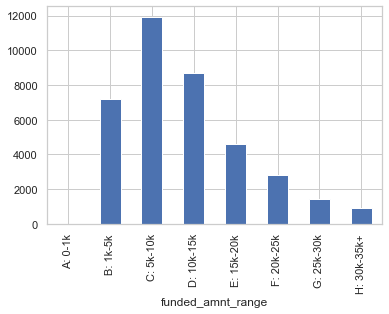

In [34]:
#ploting a bar graph 
ax = sub_df.groupby('funded_amnt_range').funded_amnt_range.count().plot.bar()
plt.show()

--------
--------
### Variable :  loan_amnt

In [35]:
#creating a drive column loan_amnt_range
sub_df['loan_amnt_range'] = sub_df['loan_amnt'].apply(lambda x: next((v for k, v in d.items() if x in k), 'na'))
sub_df['loan_amnt_range'].value_counts()


C: 5k-10k      11667
D: 10k-15k      8490
B: 1k-5k        7083
E: 15k-20k      4568
F: 20k-25k      3004
G: 25k-30k      1663
H: 30k-35k+     1057
A: 0-1k           12
Name: loan_amnt_range, dtype: int64

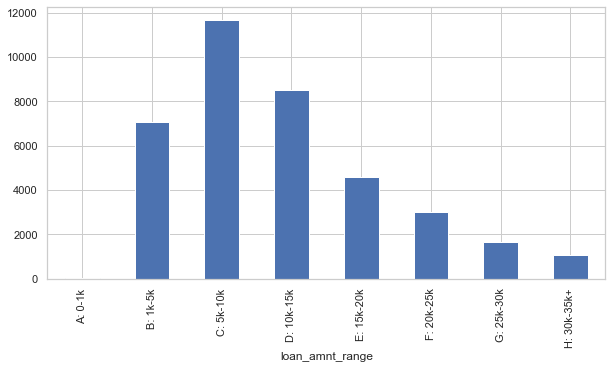

In [36]:
#ploting a bar graph 
plt.figure(figsize=(10,5))
ax = sub_df.groupby('loan_amnt_range').loan_amnt_range.count().plot.bar()
plt.show()

--------
--------
### Variable :  purpose

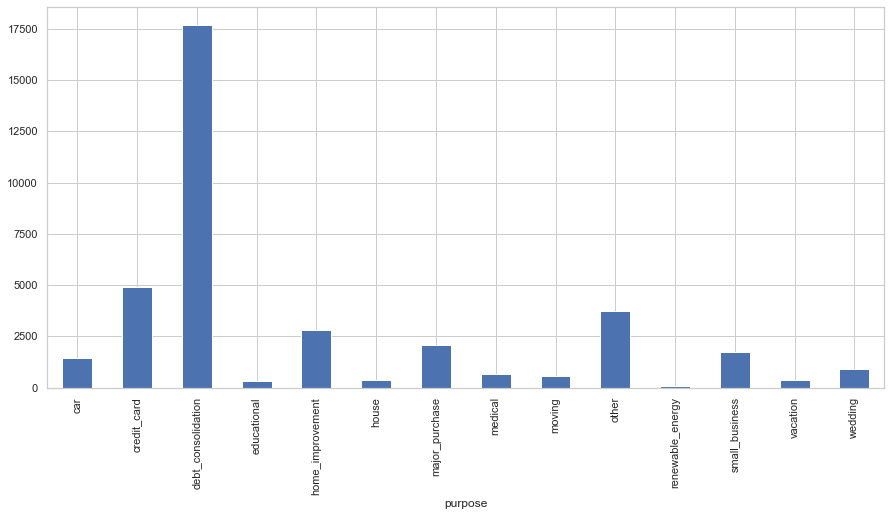

In [37]:
plt.figure(figsize=(15,7))
ax = sub_df.groupby('purpose').purpose.count().plot.bar()
plt.show()


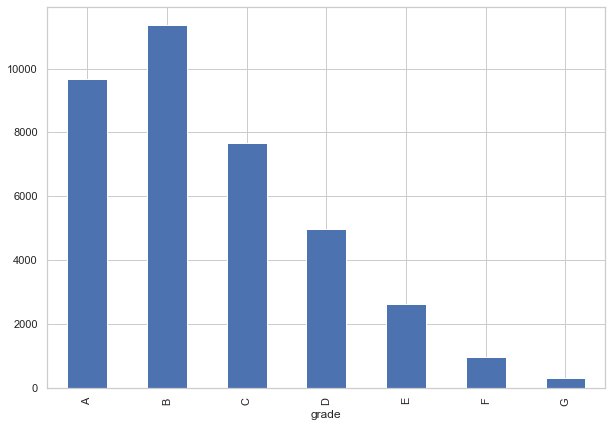

In [38]:
plt.figure(figsize=(10,7))
ax = sub_df.groupby('grade').purpose.count().plot.bar()
plt.show()

--------
--------
### Variable :  issue_d

In [39]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
sub_df['issue_d'].head()

38469    Nov-07
38322    Jan-08
37788    Mar-08
38200    Jan-08
38298    Jan-08
Name: issue_d, dtype: object

In [40]:
from datetime import datetime
sub_df['issue_d'] = sub_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))


In [41]:
# extracting month and year from issue_date
sub_df['issue_month'] = sub_df['issue_d'].apply(lambda x: x.month)
sub_df['issue_year'] = sub_df['issue_d'].apply(lambda x: x.year)

In [42]:
# let's first observe the number of loans granted across years
sub_df.groupby('issue_year').issue_year.count()

issue_year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: issue_year, dtype: int64

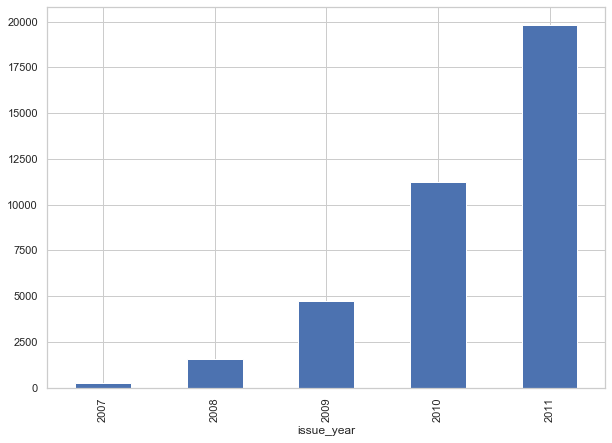

In [43]:
plt.figure(figsize=(10,7))
ax = sub_df.groupby('issue_year').purpose.count().plot.bar()
plt.show()

**Observation**: The number of loans has increased steadily across years. 

In [44]:
# number of loans across months
sub_df.groupby('issue_month').issue_month.count()

issue_month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: issue_month, dtype: int64

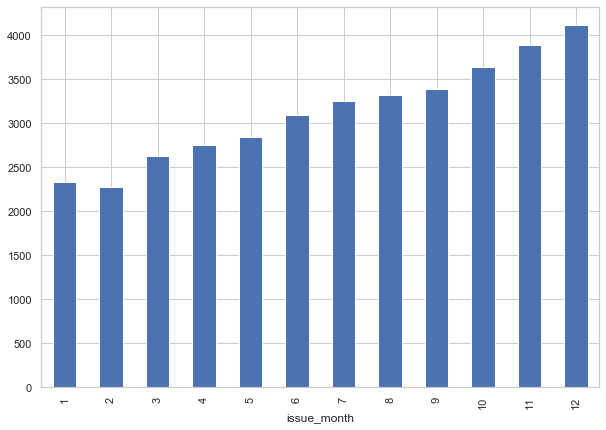

In [45]:
plt.figure(figsize=(10,7))
ax = sub_df.groupby('issue_month').purpose.count().plot.bar()
plt.show()

**Observation**: 
Most loans are granted in December, and in general in the latter half of the year.

# Segment univariate and bivariate analysis.

Lets take a look to univariate and bivariate analysis.


In [46]:
# creating two functions for ploting a chart for base on the categorical variable

## this will work on both dataframes(lone_df and sub_df) 
def plotf(xvar, huevar):
    sub_df.sort_values(xvar, inplace=True )
    if len(huevar)==0: 
        sub_df.sort_values(xvar, inplace=True )
        sns.barplot(x=xvar, y='loan_status' ,data=sub_df)
    else :
        sub_df.sort_values([xvar,huevar], inplace=True )
        sns.barplot(x=xvar, y='loan_status', hue=huevar, data=sub_df)
    plt.show()
    
## this will work on loan_df     
def plotloan_df(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    add_value_labels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

--------
--------
### Variable :  loan_status and grade

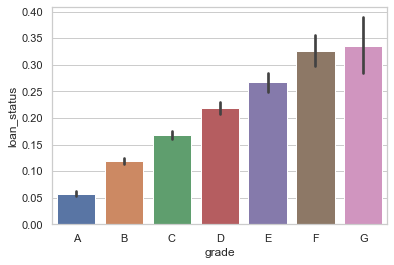

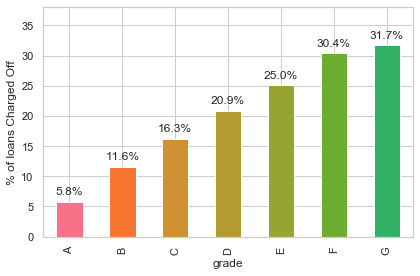

In [47]:
#grade
plotf('grade','')
plotloan_df(loan_df,'grade')

**Observation:**
Clearly, as the loan grade goes from A to G, the default rate increases. 

--------
--------
### Variable :  loan_status and sub_grade

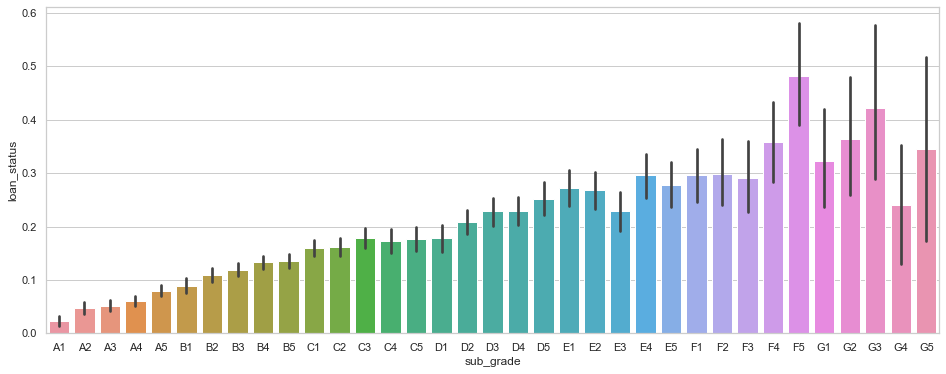

In [48]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
plotf('sub_grade','')

**Observation:**
Clearly, as the loan sub grade goes from A to G, the default rate increases. 

--------
--------
### Variable :  loan_status and loan_amnt

In [49]:
sub_df[sub_df['loan_status'] ==1]['loan_amnt']

32089     7500
26011     3250
4794     12500
18586     4000
8690     14500
         ...  
33037    19750
25991    22000
19300     6200
35037    16750
24602    25000
Name: loan_amnt, Length: 5399, dtype: int64

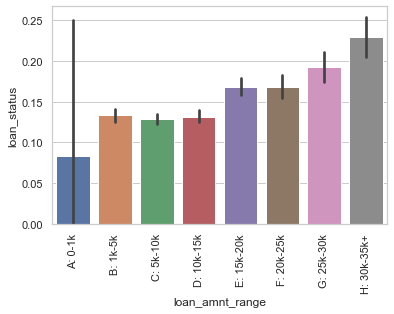

In [50]:
#loan_amnt_range
plt.xticks(rotation=90)
plotf('loan_amnt_range','')


**Observation:**
Clearly, as the loan amount goes from higher, the default rate increases. 


--------
--------
### Variable :  loan_status and int_rate

In [51]:
# int_rate:
print(sub_df['int_rate'])

38068     8.63
37824    12.29
38298    10.46
38136    12.29
38469     8.07
         ...  
4957      8.90
6061     11.71
744      16.77
10871    17.49
10611    18.79
Name: int_rate, Length: 37544, dtype: float64


In [52]:
print(sub_df.int_rate.describe())

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64


In [53]:
#create new columns interest_rate_round by rounding the int_rate 
sub_df['interest_rate_round'] = round(sub_df['int_rate'])
print(sub_df.interest_rate_round.describe())


count    37544.000000
mean        11.954560
std          3.675162
min          5.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         24.000000
Name: interest_rate_round, dtype: float64


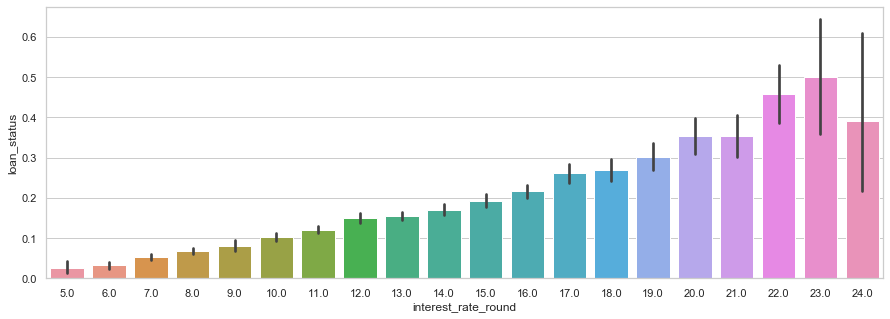

In [54]:
#interest_rate_round
plt.figure(figsize=(15, 5))
plotf('interest_rate_round','')

**Observation:**
Clearly, as the loan interest rate goes from higher, the default rate increases. 

--------
--------
### Variable :  loan_status and term

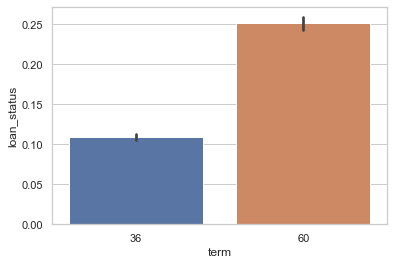

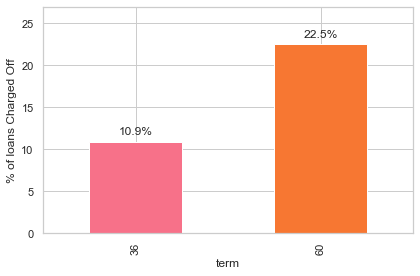

In [55]:
# term:
plotf('term','')
plotloan_df(loan_df,'term')

**Observation:**
Clearly, as the longer is the loan term the higher the default rate. 

--------
--------
### Variable :  loan_status, term and grade

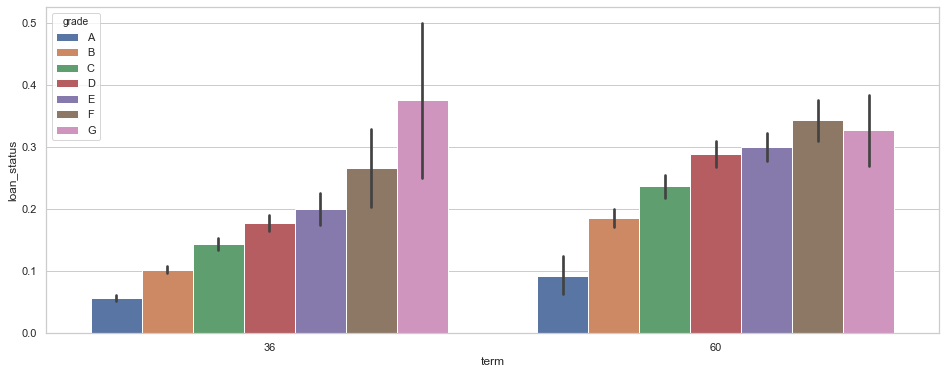

In [56]:
plt.figure(figsize=(16, 6))
plotf('term','grade' )

**Observation:** G grade applicant have less defualt if term is 60 months 

--------
--------
### Variable :  loan_status and home_ownership

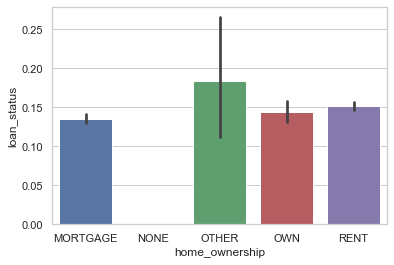

In [57]:
# home ownership
plotf('home_ownership','')

**Observation:** home ownership dose not impact the target variable 

--------
--------
### Variable :  loan_status and verification_status

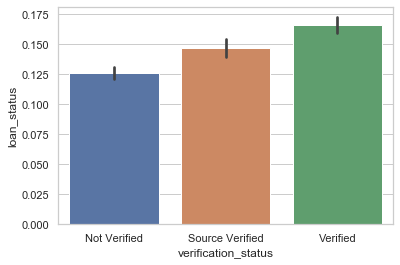

In [58]:
# verification_status
plotf('verification_status', '')

**Observation:** interesting fact, "verified" verification status have higher the default rate in comparison to "Not varified"

--------
--------
### Variable :  loan_status and purpose

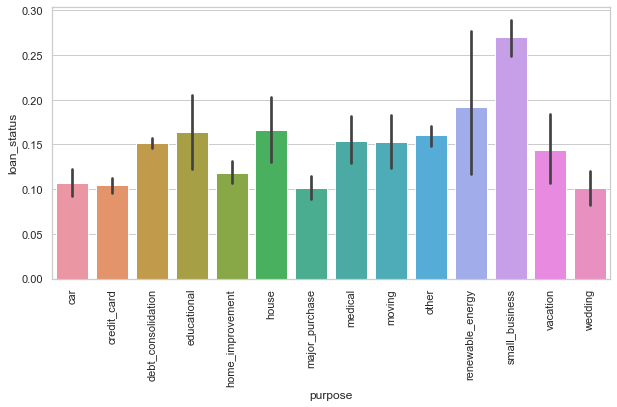

In [59]:
# purpose
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plotf('purpose', '')

**Observation:** Small business have higher the default rate.

--------
--------
### Variable :  loan_status and annual_inc

In [60]:
sub_df.annual_inc.describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

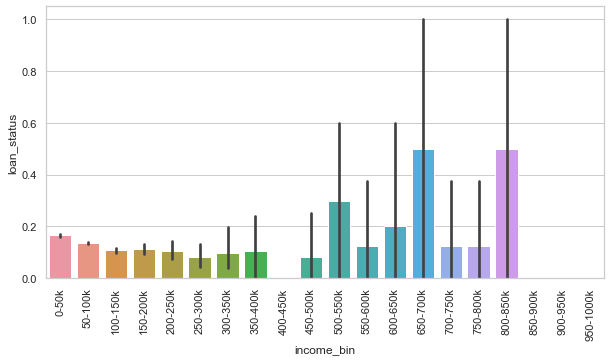

In [61]:
# income_bin
sub_df['annual_inc'] =sub_df['annual_inc'].astype('int64') 
sub_df['income_bin'] = pd.cut(sub_df['annual_inc'],[x for x in range(0, 1050000, 50000)], labels=[str(x)+'-'+str(x+50)+'k' for x in range (0, 1000, 50)])
sub_df['income_bin'].head()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plotf('income_bin', '')


**Observation:** Lower and higher income applicants have higher the default rate.

--------
--------
### Variable :  loan_status and installment

In [62]:
#analysing
sub_df['installment']

18935    422.15
26509    207.18
13410    294.96
4222     264.61
36974    399.78
          ...  
28653    334.08
32907    198.78
27942     90.99
26638    129.18
32357    312.19
Name: installment, Length: 37544, dtype: float64

In [63]:
#analysing
sub_df.installment.describe()

count    37544.000000
mean       324.650164
std        208.901055
min         15.690000
25%        167.370000
50%        280.000000
75%        428.942500
max       1305.190000
Name: installment, dtype: float64

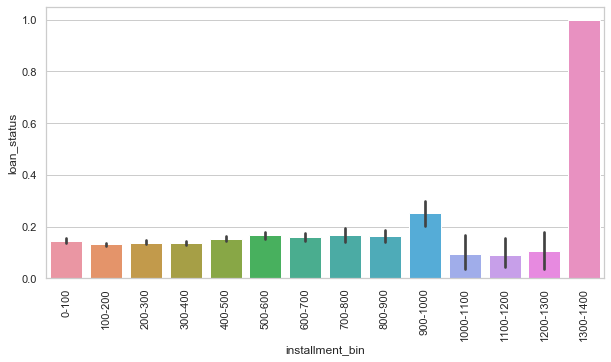

In [64]:
sub_df['installment_bin'] = pd.cut(sub_df['installment'],[x for x in range(0, 1500, 100)], labels=[str(x)+'-'+str(x+100) for x in range (0, 1400, 100)])
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plotf('installment_bin', '')

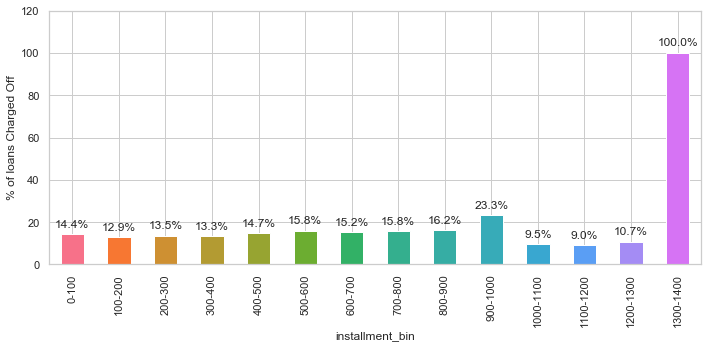

In [65]:
loan_df['installment_bin'] = pd.cut(loan_df['installment'],[x for x in range(0, 1500, 100)], labels=[str(x)+'-'+str(x+100) for x in range (0, 1400, 100)])
plt.figure(figsize=(10, 5))
plotloan_df(loan_df,'installment_bin')

**Observation:** installment does not impact target variable

--------
--------
### Variable :  loan_status and issue_year

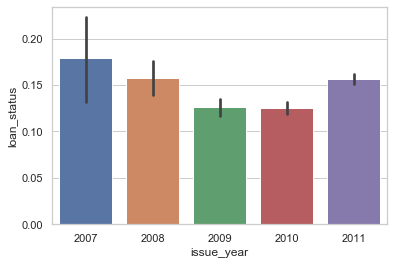

In [66]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plotf('issue_year','')


**Observation:**  issued year dose not help.

--------
--------
### Variable :  loan_status and issue_month

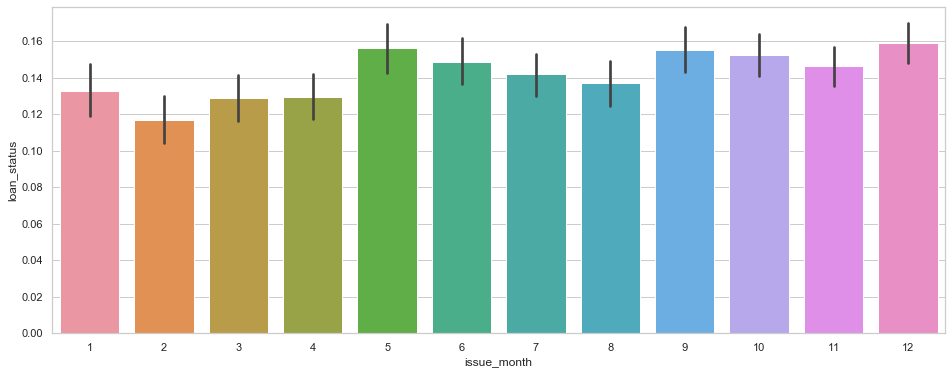

In [67]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(16, 6))
plotf('issue_month','')


**Observation:**  The loan have been taken around mid of the year or end of the year are more like to be default.

--------
--------
### Variable :  loan_status and loan_amnt_range

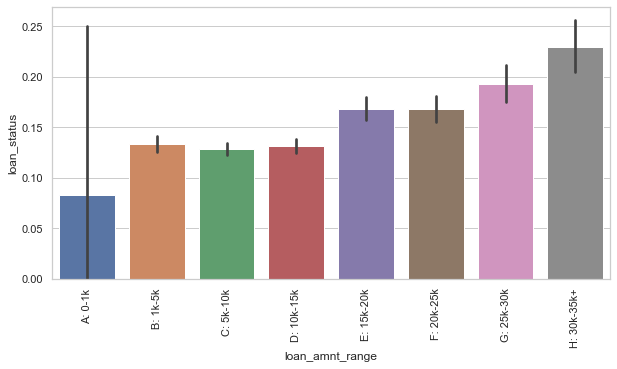

In [68]:
# let's compare the default rates across loan amount type
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plotf('loan_amnt_range','')

**Observation :**  higher the loan amount, higher the default rate

--------
--------
### Variable :  loan_status and dti

In [69]:
sub_df.dti.describe()

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

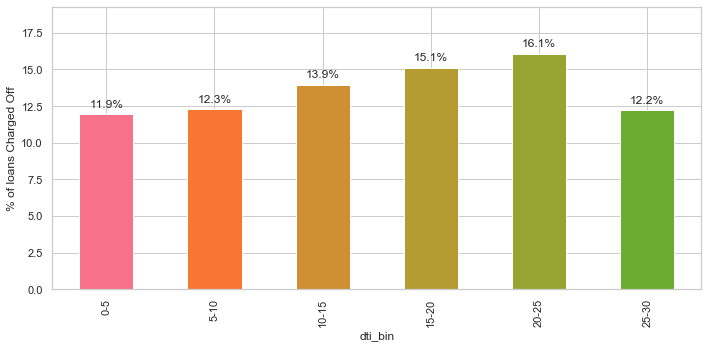

In [70]:
# Create derived variable 
loan_df['dti_bin'] = pd.cut(loan_df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
plt.figure(figsize=(10, 5))
plotloan_df(loan_df,'dti_bin')



--------
--------
### Variable :  loan_status, loan_amnt and grade

In [71]:
sub_df.loan_amnt.describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

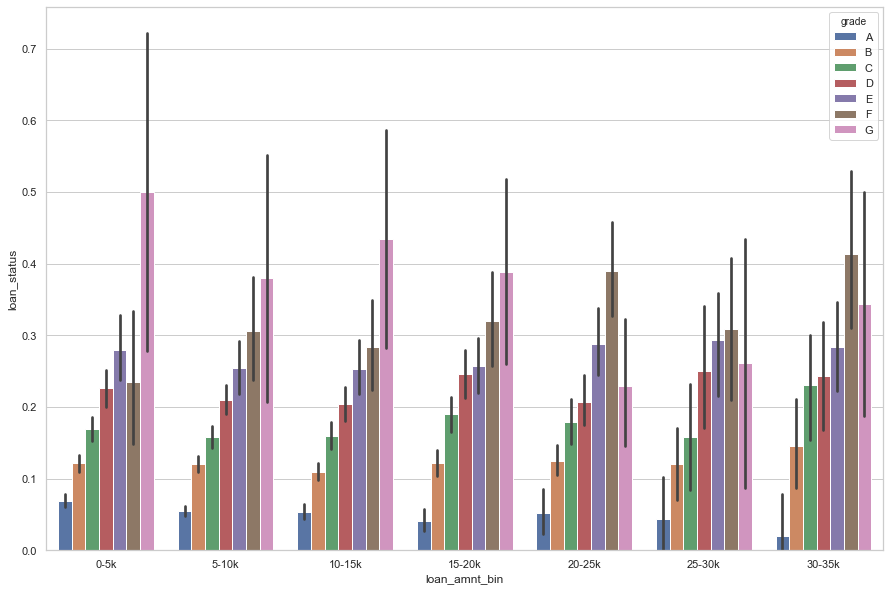

In [72]:
plt.figure(figsize=(15, 10))
sub_df['loan_amnt_bin'] = pd.cut(sub_df['loan_amnt'],[x for x in range(0, 40000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])
plotf('loan_amnt_bin','grade')



**Observation:** 
1. Under 5k loan amuont have higher the default rate for G grade applicant.
2. The higer the loan amount the lower the default rate for A grade applicant.
    

--------
--------
### Variable :   annual_inc and loan_amnt

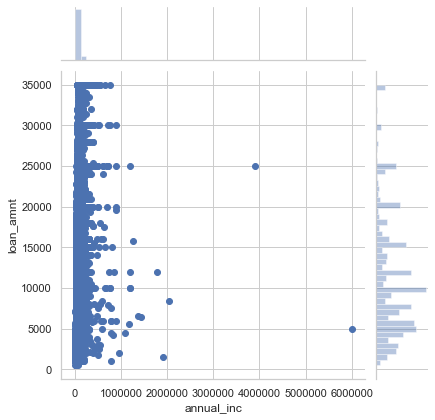

In [73]:
sns.jointplot('annual_inc', 'loan_amnt', sub_df)
plt.show()

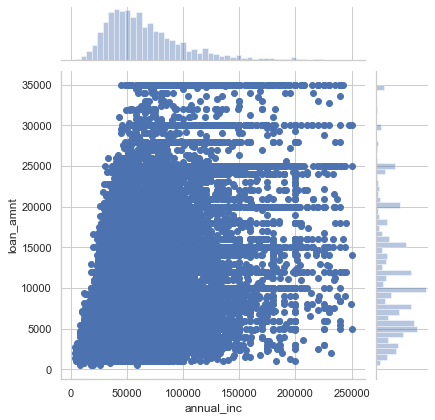

In [74]:
sns.jointplot('annual_inc', 'loan_amnt', sub_df.loc[sub_df['annual_inc']<250000])
plt.show()

**Observation:**
- There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

--------
--------
### Variable :  loan_amnt recovers

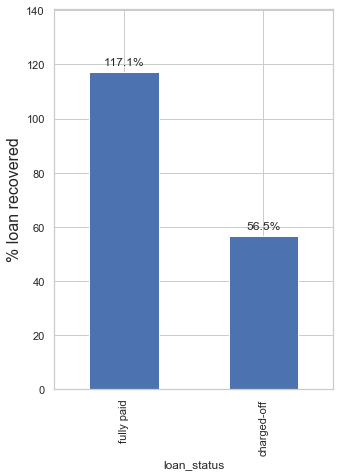

In [75]:
plt.figure(figsize=(5,7))
labels = [ 'fully paid', 'charged-off']
ax = (sub_df.groupby('loan_status').total_pymnt.sum() * 100 / sub_df.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
ax.set_xticklabels(labels)
plt.margins(0.2, 0.2)
add_value_labels(ax)



<mark>Lending Club only recovers 56.5% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit. </mark>

## heatmap

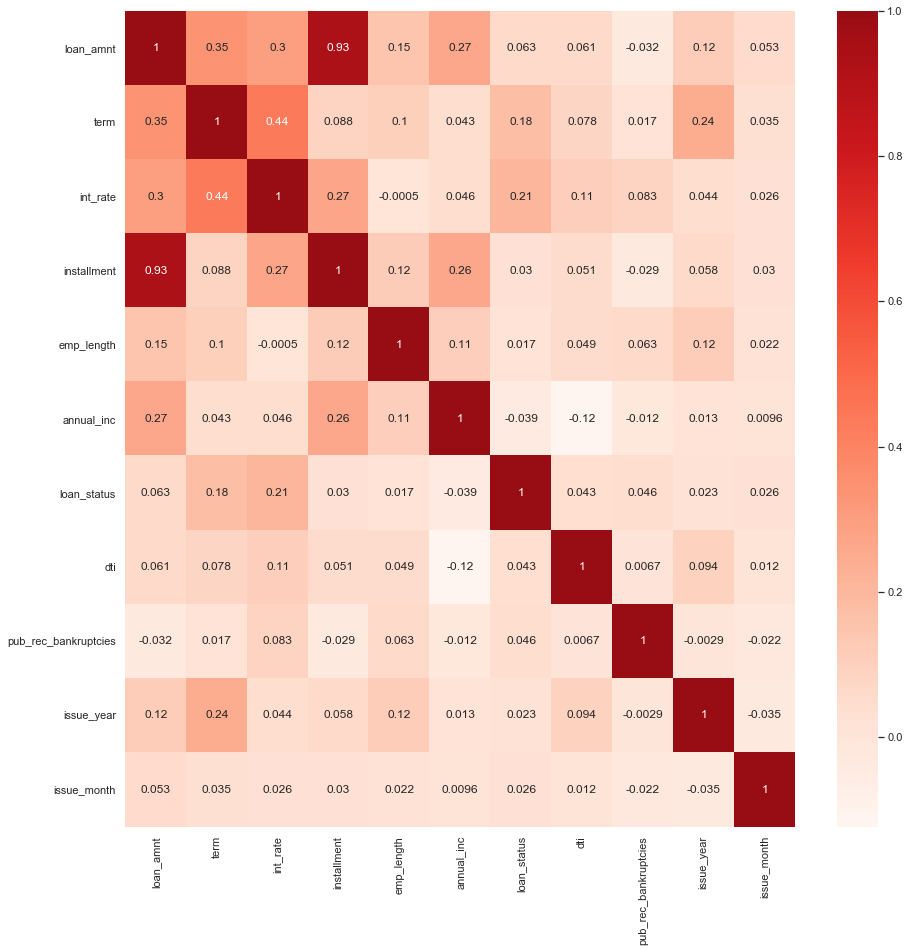

In [76]:
plt.figure(figsize=(15,15))
cont_var=[
'loan_amnt',
'term',
'int_rate',
'installment',
'emp_length',
'annual_inc',
'loan_status',
'pymnt_plan',
'purpose',
'title',
'zip_code',
'addr_state',
'dti',
'initial_list_status',
'application_type',
'pub_rec_bankruptcies',
'issue_year',
'issue_month'
]
corr = sub_df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5, cmap="Reds")